In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix


In [31]:
df = pd.read_csv("train.csv")
df.head()

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169


In [32]:
X = df.drop('labels',axis = 1)
Y = df['labels']

In [33]:
from sklearn.model_selection import train_test_split
train,test,Y_train,Y_tests = train_test_split(X,Y, test_size=0.2, random_state = 20113046)
train.shape,test.shape,Y_train.shape

((4200, 1200), (1050, 1200), (4200,))

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train = sc.fit_transform(train)
test= sc.transform(test)

In [35]:
# Libraries for Model Building
from keras.models import Sequential
from keras.layers import Dense
from tensorflow_addons.metrics import RSquare

/*I have chosen the hidden layers to be 4 as our dataset is large and number of neuron units is decided using the closest power of 2 to the sqrt of the previous input neuron units as it is the most optimal.
Hence, sqrt(1200)=36 around and sqrt(36)=6 and so on. As it is a bnary classification problem, I have 
used sigmoid activation function in the output layer*/

In [36]:
# 1. Creating a Model - Breast Cancer Model
model = Sequential()

# 2. Defining Architecture
model.add(Dense(units=36, activation = 'relu',input_dim=1200))
model.add(Dense(units=6, activation = 'relu'))
model.add(Dense(units=2, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid')) 

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
132/132 [==============================] - 2s 4ms/step - loss: 0.4264 - accuracy: 0.7869
Epoch 2/100
132/132 [==============================] - 1s 4ms/step - loss: 0.3159 - accuracy: 0.8762
Epoch 3/100
132/132 [==============================] - 1s 4ms/step - loss: 0.2332 - accuracy: 0.9352
Epoch 4/100
132/132 [==============================] - 1s 4ms/step - loss: 0.1757 - accuracy: 0.9760
Epoch 5/100
132/132 [==============================] - 1s 4ms/step - loss: 0.1432 - accuracy: 0.9902
Epoch 6/100
132/132 [==============================] - 1s 4ms/step - loss: 0.1252 - accuracy: 0.9938
Epoch 7/100
132/132 [==============================] - 1s 4ms/step - loss: 0.1113 - accuracy: 0.9957
Epoch 8/100
132/132 [==============================] - 1s 4ms/step - loss: 0.1016 - accuracy: 0.9967
Epoch 9/100
132/132 [==============================] - 1s 4ms/step - loss: 0.0916 - accuracy: 0.9976
Epoch 10/100
132/132 [==============================] - 1s 5ms/step - loss: 0.0849 - accura

In [38]:
predictions = model.predict(test)
score = model.evaluate(test, Y_tests)
score

33/33 [==============================] - 0s 3ms/step - loss: 1.1293 - accuracy: 0.7848


[1.1292937994003296, 0.784761905670166]

In [39]:
import sklearn
from sklearn.metrics import r2_score
r2 = r2_score(Y_tests, predictions)
print('The rsquared value is: ' + str(r2))

The rsquared value is: 0.09560287961437863


In [40]:
model.save("ANN.h5")

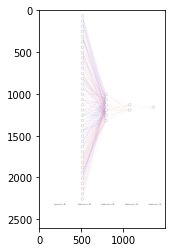

In [41]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img
  
# reading the image
testImage = img.imread('nn.jpg')
# modifying the shape of the image
modifiedImage = testImage[:,1500:3000, :]
  
# displaying the image
plt.imshow(modifiedImage)

/*TO display the image of architecture of ANN applied using PIL*/

In [42]:
from PIL import Image
 
# creating a object
im = Image.open("nn.jpg")
 
im.show()

In [43]:
predict_x=model.predict(test) 
print(predict_x)
classes_x=np.argmax(predict_x,axis=1)

33/33 [==============================] - 0s 4ms/step
[[0.0000000e+00]
 [9.3652123e-01]
 [7.8626303e-03]
 ...
 [9.9220693e-01]
 [0.0000000e+00]
 [8.9408049e-06]]


In [44]:
classes_x

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
ct=0 #ct variable store number of label 1 in the generated predicted labels of test dataset
for i in range(1050):
    if classes_x[i]==1:
        ct+=1
ct

0

In [46]:
predict_x.shape

(1050, 1)

In [47]:
yhat = np.asarray(predict_x)
yhat

array([[0.0000000e+00],
       [9.3652123e-01],
       [7.8626303e-03],
       ...,
       [9.9220693e-01],
       [0.0000000e+00],
       [8.9408049e-06]], dtype=float32)

In [48]:
yhat = yhat[:,0]
yhat.shape

(1050,)

In [49]:
yhat

array([0.0000000e+00, 9.3652123e-01, 7.8626303e-03, ..., 9.9220693e-01,
       0.0000000e+00, 8.9408049e-06], dtype=float32)

In [50]:
yhat[2]

0.00786263

In [51]:
for i in range(1050):
    if yhat[i]<=0.06:
        yhat[i]=0.0
    else:
        yhat[i]=1.0
yhat

array([0., 1., 0., ..., 1., 0., 0.], dtype=float32)

In [52]:
y_class = yhat.astype('i')
y_class

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

In [53]:
y_class.shape

(1050,)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [55]:
ct=0 #ct variable store number of label 1 in the generated predicted labels of test dataset
for i in range(1050):
    if y_class[i]==1:
        ct+=1
ct

426

In [56]:
accuracy = accuracy_score(Y_tests, y_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_tests, y_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_tests, y_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_tests, y_class)
print('F1 score: %f' % f1)

Accuracy: 0.750476
Precision: 0.532864
Recall: 0.782759
F1 score: 0.634078


In [57]:
df2 = pd.read_csv("test.csv")
df2.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000


In [59]:
X_test = df2.drop("id",axis=1)
X_test.shape

(2250, 1200)

In [60]:
Y_ans = model.predict(X_test)

71/71 [==============================] - 1s 5ms/step


In [65]:
Y_ans

array([[0.5829626 ],
       [0.00808257],
       [0.9867478 ],
       ...,
       [0.99220693],
       [0.        ],
       [0.99220693]], dtype=float32)

In [67]:
Y_ans = Y_ans[:,0]
Y_ans.shape

(2250,)

In [69]:
yhat = np.asarray(Y_ans)
yhat.shape
yhat

array([0.5829626 , 0.00808257, 0.9867478 , ..., 0.99220693, 0.        ,
       0.99220693], dtype=float32)

In [71]:
for i in range(2250):
    if yhat[i]<=0.65:
        yhat[i]=0
    else:
        yhat[i]=1   
yhat 

array([0., 0., 1., ..., 1., 0., 1.], dtype=float32)

In [72]:
y_res = yhat.astype("i")
y_res

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [73]:
rows = np.empty((2250,2))
rows.shape

(2250, 2)

In [74]:
new_rows = rows.astype('i')
new_rows.dtype

dtype('int32')

In [75]:
for i in range(2250):
    new_rows[i][0]=i+1
    new_rows[i][1]=y_res[i]

In [76]:
# writing to CSV


import csv
	
# field names
fields = ['id', 'labels']
	
rows = new_rows
	
# name of csv file
filename = "solutionbyANN.csv"
	
# writing to csv file 
with open(filename, 'w',newline = '') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)